# Convolutional neural networks with Keras + Tensorflow.
There are 3 APIs for building DL models in Keras:
* The sequential model: a Python list, limited to simple stacks of layers.
* The Functional API: graph-like model architecture, most commonly-used model building API.
* Model subclassing: a low-level option where you can write everything from scratch. This is a good option if you want to have full control over everything.
![keras workflows](img_embed/keras_workflows.png)

# Sequential model

In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.build(input_shape=(None, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## Incrementally building a Sequential model

In [5]:
model = keras.Sequential(name="my_first_model")
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu", name="hidden layer"))
model.add(layers.Dense(10, activation="softmax", name="output layer"))
model.summary()

Model: "my_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden layer (Dense)                 │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# Functional API

In [7]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu", name="hidden layer")(inputs)
output = layers.Dense(10, activation="softmax", name="output layer")(features)
model = keras.Model(inputs, output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden layer (Dense)                 │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
inputs.shape

(None, 3)

In [9]:
inputs.dtype

'float32'

We can draw the model architecture if we use functional API.

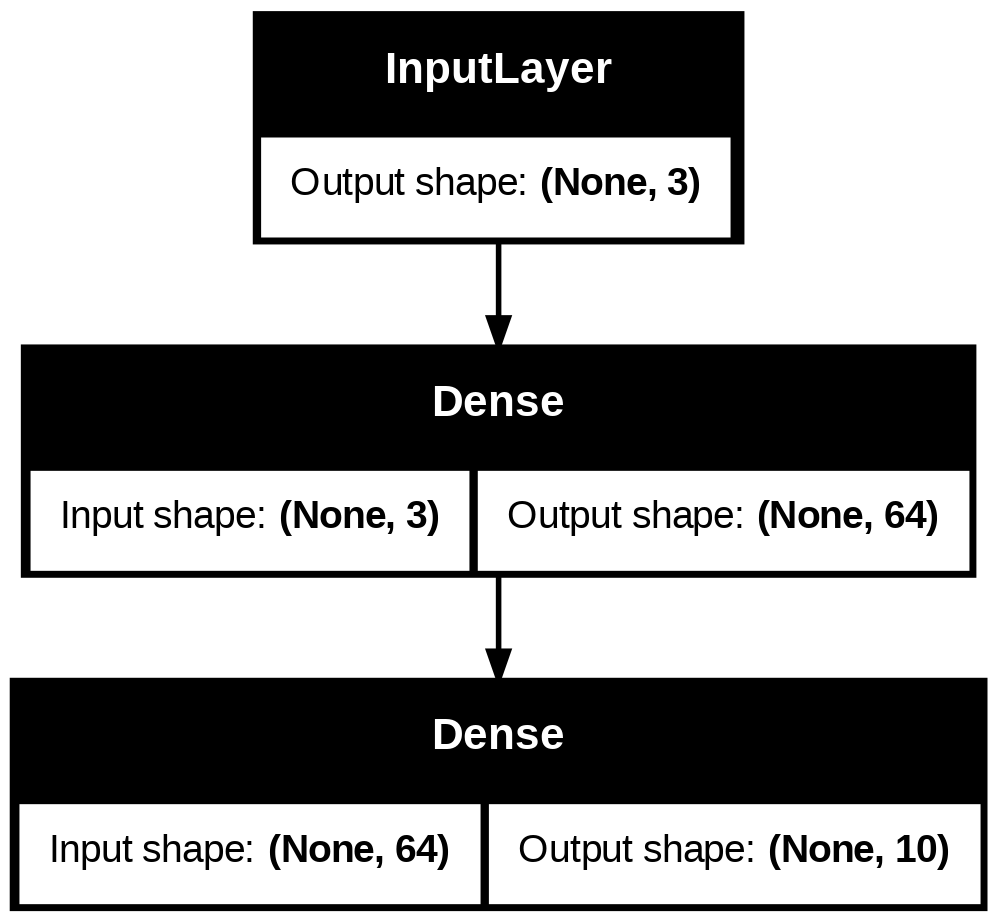

In [11]:
keras.utils.plot_model(model, "first_model.png", show_shapes=True)

# Model subclassing

In [12]:
import numpy as np
from keras import ops

In [13]:
class Linear(layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(
            shape=(input_dim, units),
            initializer="random_normal",
            trainable=True
        )
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return ops.matmul(inputs, self.w) + self.b

In [14]:
x = ops.ones((4, 4))
linear_layer = Linear(8, 4)
y = linear_layer(x)
print(y)

tf.Tensor(
[[ 0.07885641  0.03129498 -0.12814209  0.07094781  0.12159662  0.08760488
  -0.00818874  0.0772652 ]
 [ 0.07885641  0.03129498 -0.12814209  0.07094781  0.12159662  0.08760488
  -0.00818874  0.0772652 ]
 [ 0.07885641  0.03129498 -0.12814209  0.07094781  0.12159662  0.08760488
  -0.00818874  0.0772652 ]
 [ 0.07885641  0.03129498 -0.12814209  0.07094781  0.12159662  0.08760488
  -0.00818874  0.0772652 ]], shape=(4, 8), dtype=float32)


## Standard workflow for deep learning image classification with keras.

In [15]:
from keras.datasets import fashion_mnist

## Image loading and preprocessing

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# scale images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# add channel dimension to the image dataset

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
# add channel dimension to images
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## Design the model architecture

In [23]:
num_classes = 10
input_shape = x_train.shape[1:]

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="conv1_block1"),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="conv2_block1"),
    layers.MaxPooling2D(pool_size=(2, 2), name="mp_block1"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv1_block2"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv2_block2"),
    layers.MaxPooling2D(pool_size=(2, 2), name="mp_block2"),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", name="conv1_block3"),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax", name="output_layer")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1_block1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_block1 (Conv2D)                │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_block1 (MaxPooling2D)             │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_block2 (Conv2D)                │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_block2 (Conv2D)                │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_block2 (MaxPooling2D)             │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_block3 (Conv2D)                │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,138 (547.41 KB)

 Trainable params: 140,138 (547.41 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model
Specify the optimizer, loss function and metrics to monitor.

In [24]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc")
    ]
)

## Train the model

In [25]:
batch_size = 128
epochs = 30
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 121s 282ms/step - acc: 0.5972 - loss: 1.1032 - val_acc: 0.7927 - val_loss: 0.5317
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 136s 268ms/step - acc: 0.7991 - loss: 0.5464 - val_acc: 0.8482 - val_loss: 0.3969
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 139s 261ms/step - acc: 0.8379 - loss: 0.4496 - val_acc: 0.8738 - val_loss: 0.3310
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 156s 294ms/step - acc: 0.8639 - loss: 0.3835 - val_acc: 0.8810 - val_loss: 0.3217
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 134s 276ms/step - acc: 0.8768 - loss: 0.3410 - val_acc: 0.8890 - val_loss: 0.2942
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 136s 263ms/step - acc: 0.8847 - loss: 0.3222 - val_acc: 0.8972 - val_loss: 0.2763
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 139s 256ms/step - acc: 0.8930 - loss: 0.2953 - val_acc: 0.9040 - val_loss: 0.2588
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 108s 257ms/step - acc: 0.8947 - loss: 0.2878 - val_acc: 0.9020 - val_loss: 0.2636
Epoch 9/30
422/422 ━━━━━

## Evaluation

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)

In [28]:
test_loss, test_acc = score
print("The test accuracy:", round(test_acc, 4) * 100, "%")

The test accuracy: 91.34 %


## Prediction

In [34]:
import random
random_idx = random.randrange(x_test.shape[0])
preds = model.predict(np.expand_dims(x_test[random_idx], 0))

print("The model prediction:", np.argmax(preds))
print("The actual label:", y_test[random_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The model prediction: 3
The actual label: 3
